In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:

csv = ".\csv\PlayerStat.csv"

df = pd.read_csv(csv)
df.isnull().sum()
df.fillna(0, inplace=True)  # or use df.dropna()
df_time_range = df[df['season']==2024]
df_time_range = df_time_range[['player_id','player','fg_per_game', 'x3p_percent', 'x2p_per_game',
       'ft_per_game', 
       'trb_per_game', 'ast_per_game',
       'stl_per_game', 'blk_per_game', 'tov_per_game', 
       'pts_per_game']]
df_time_range[df_time_range['id ']]

,player_id,player,fg_per_game,x3p_percent,x2p_per_game,ft_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pts_per_game
522,5025,A.J. Green,1.5,0.408,0.3,0.3,1.1,0.5,0.2,0.1,0.2,4.5
523,5026,A.J. Lawson,1.3,0.260,1.0,0.4,1.2,0.5,0.2,0.1,0.3,3.2
524,5027,AJ Griffin,0.9,0.256,0.4,0.1,0.9,0.3,0.1,0.1,0.4,2.4
525,4219,Aaron Gordon,5.5,0.290,4.9,2.4,6.5,3.5,0.8,0.6,1.4,13.9
526,4582,Aaron Holiday,2.4,0.387,1.3,0.7,1.6,1.8,0.5,0.1,0.7,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...
1252,4299,Zach LaVine,6.8,0.349,4.4,3.5,5.2,3.9,0.8,0.3,2.1,19.5
1253,5023,Zavier Simpson,2.4,0.294,1.7,0.4,2.9,3.6,1.0,0.4,1.4,6.0
1254,4898,Zeke Nnaji,1.2,0.261,1.1,0.7,2.2,0.6,0.3,0.7,0.5,3.2
1255,5024,Ziaire Williams,2.9,0.307,1.8,1.2,3.5,1.5,0.7,0.2,1.3,8.2


In [68]:
## standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_time_range[['pts_per_game','ast_per_game','trb_per_game',"tov_per_game"]])
df_time_range["PPG_norm"] = scaled_features[:,0]
df_time_range["APG_norm"] = scaled_features[:,1]
df_time_range["RPG_norm"] = scaled_features[:,2]
df_time_range["TPG_norm"] = -scaled_features[:,3]
df_time_range[["PPG_norm","APG_norm","RPG_norm","TPG_norm"]]

,PPG_norm,APG_norm,RPG_norm,TPG_norm
522,-0.543784,-0.797180,-0.922385,0.981591
523,-0.744481,-0.797180,-0.879267,0.849647
524,-0.867987,-0.908351,-1.008622,0.717703
525,0.907413,0.870386,1.406017,-0.601736
526,-0.219580,-0.074568,-0.706792,0.321871
...,...,...,...,...
1252,1.771955,1.092728,0.845476,-1.525344
1253,-0.312210,0.925972,-0.146251,-0.601736
1254,-0.744481,-0.741594,-0.448081,0.585759
1255,0.027432,-0.241324,0.112460,-0.469792


In [69]:
kmean = KMeans(n_clusters = 5, random_state=42)
kmean.fit(scaled_features)
df_time_range["Cluster Label"] = kmean.labels_
print(df_time_range[["player","PPG_norm","APG_norm","RPG_norm","TPG_norm","Cluster Label"]])

               player  PPG_norm  APG_norm  RPG_norm  TPG_norm  Cluster Label
522        A.J. Green -0.543784 -0.797180 -0.922385  0.981591              2
523       A.J. Lawson -0.744481 -0.797180 -0.879267  0.849647              2
524        AJ Griffin -0.867987 -0.908351 -1.008622  0.717703              2
525      Aaron Gordon  0.907413  0.870386  1.406017 -0.601736              0
526     Aaron Holiday -0.219580 -0.074568 -0.706792  0.321871              4
...               ...       ...       ...       ...       ...            ...
1252      Zach LaVine  1.771955  1.092728  0.845476 -1.525344              3
1253   Zavier Simpson -0.312210  0.925972 -0.146251 -0.601736              4
1254       Zeke Nnaji -0.744481 -0.741594 -0.448081  0.585759              2
1255  Ziaire Williams  0.027432 -0.241324  0.112460 -0.469792              4
1256  Zion Williamson  2.296856  1.704169  1.104187 -2.448951              1

[735 rows x 6 columns]


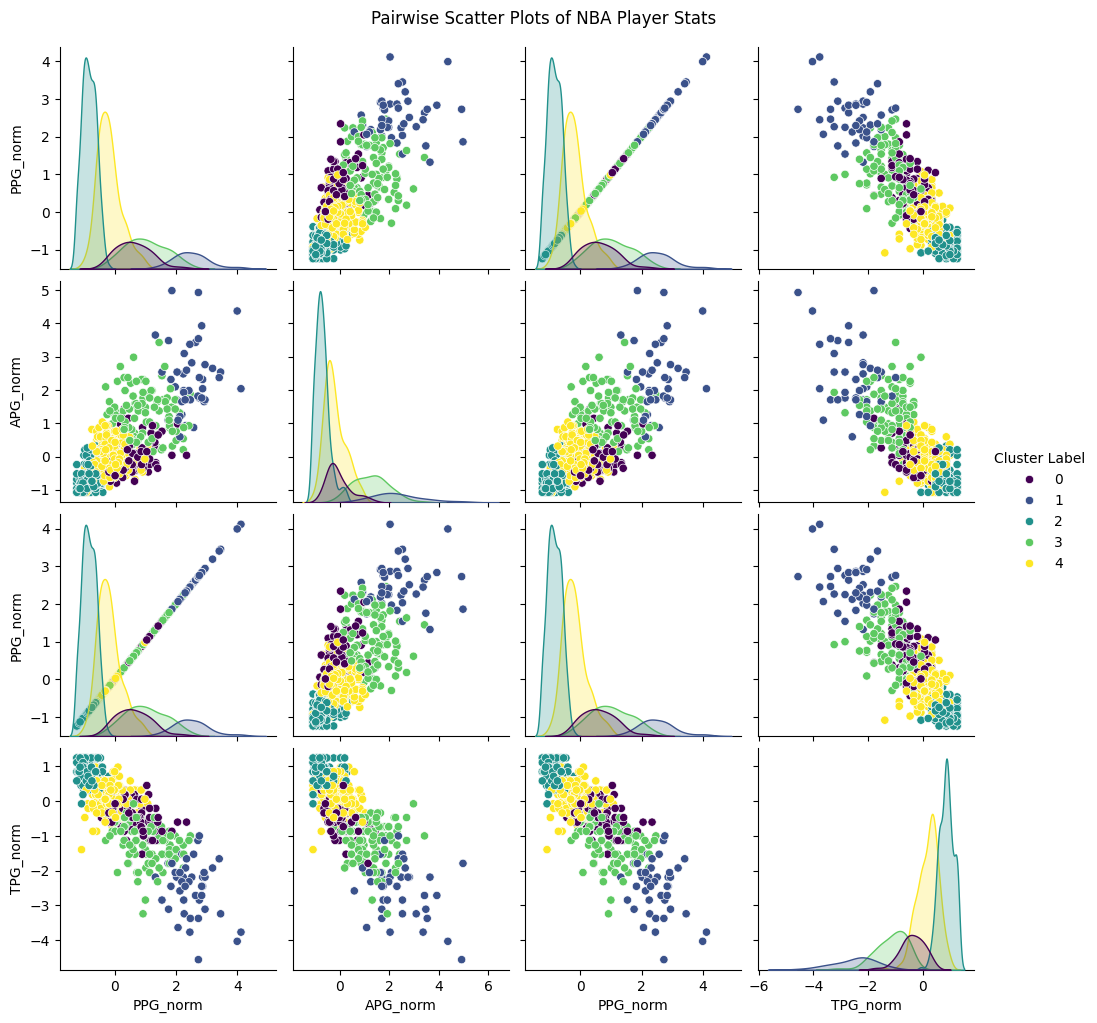

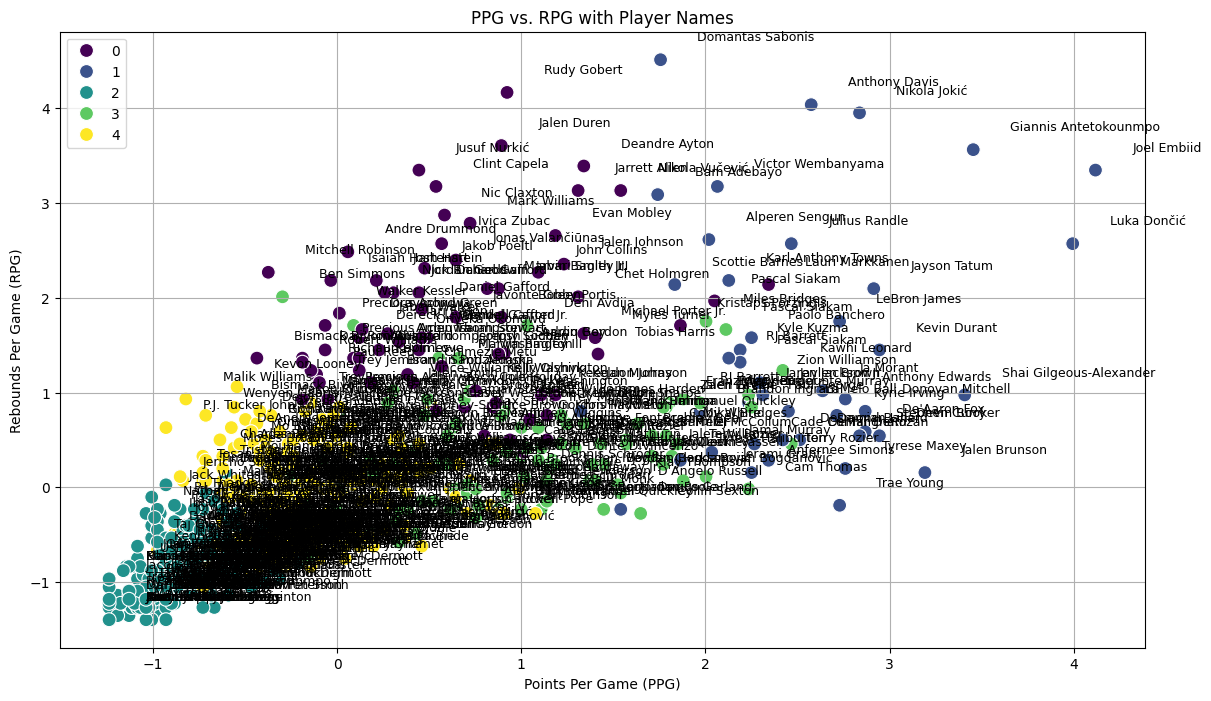

In [ ]:
import seaborn as sns

# Pairwise scatter plots
sns.pairplot(df_time_range, hue='Cluster Label', vars=['PPG_norm', 'APG_norm', 'PPG_norm',"TPG_norm"], palette='viridis')
plt.suptitle('Pairwise Scatter Plots of NBA Player Stats', y=1.02)

plt.show()

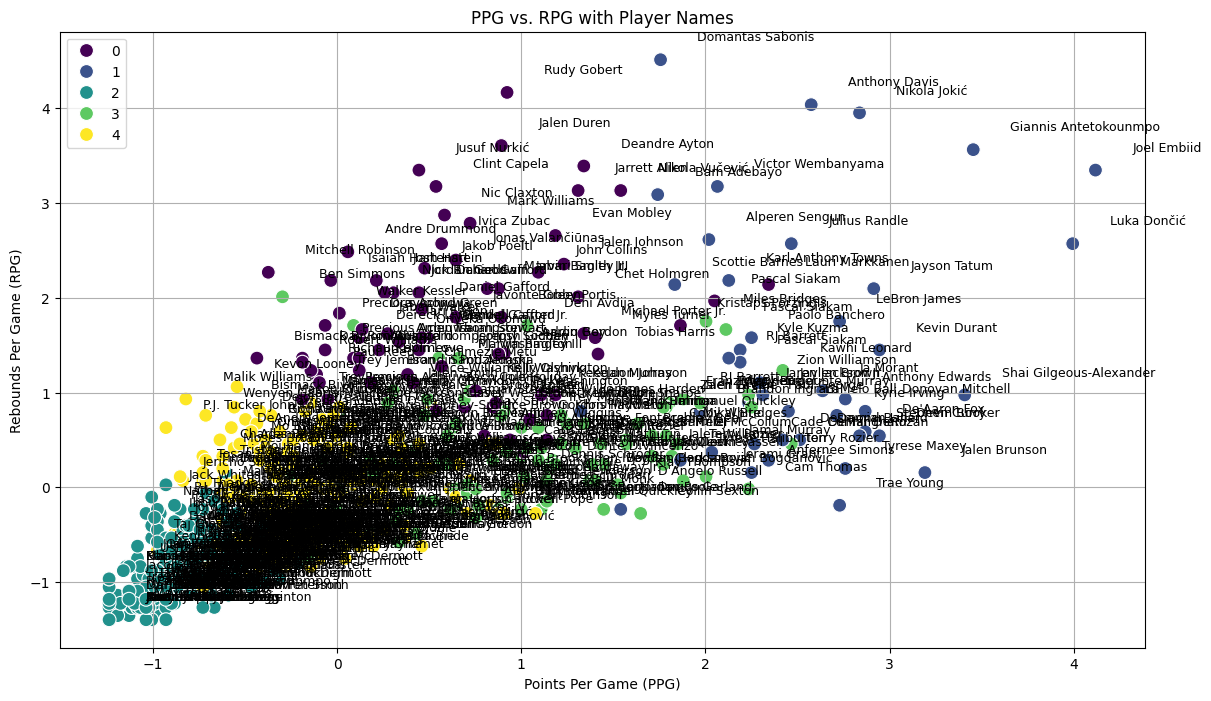

In [78]:


plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_time_range, x='PPG_norm', y='RPG_norm', hue='Cluster Label', palette='viridis', s=100)
for i, row in df_time_range.iterrows():
    plt.text(row['PPG_norm'] + 0.2, row['RPG_norm'] + 0.2, row['player'], fontsize=9)
plt.xlabel('Points Per Game (PPG)')
plt.ylabel('Rebounds Per Game (RPG)')
plt.title('PPG vs. RPG with Player Names')

plt.legend()
plt.grid()
plt.show()

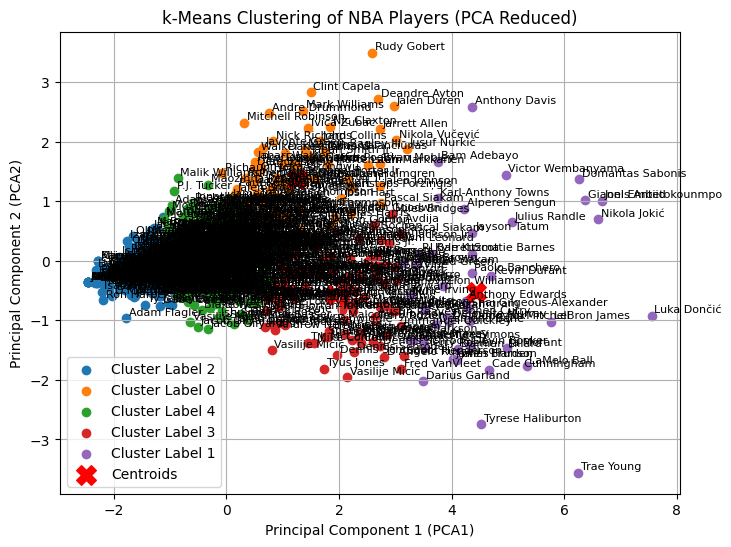

In [76]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)

# Add PCA components to the DataFrame
df_time_range['PCA1'] = X_pca[:, 0]
df_time_range['PCA2'] = X_pca[:, 1]

# Plot the clusters in 2D
plt.figure(figsize=(8, 6))
for cluster in df_time_range['Cluster Label'].unique():
    plt.scatter(
        df_time_range[df_time_range['Cluster Label'] == cluster]['PCA1'],
        df_time_range[df_time_range['Cluster Label'] == cluster]['PCA2'],
        label=f'Cluster Label {cluster}'
    )

for i ,row in df_time_range.iterrows():
    plt.text(row['PCA1'] + 0.05, row['PCA2'] + 0.05, row['player'], fontsize=8)

# Plot the cluster centers (in PCA space)
centers_pca = pca.transform(kmean.cluster_centers_)
plt.scatter(
    centers_pca[:, 0], centers_pca[:, 1],
    s=200, c='red', marker='X', label='Centroids'
)

# Add labels and title
plt.xlabel('Principal Component 1 (PCA1)')
plt.ylabel('Principal Component 2 (PCA2)')
plt.title('k-Means Clustering of NBA Players (PCA Reduced)')
plt.legend()
plt.grid()
plt.show()